<a href="https://colab.research.google.com/github/Colsai/DATA-690-WANG/blob/master/Sumo_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Study of Sumo Wrestling and Sumo Winners
Thanks to original author of dataset for compiling the data-  
Data Source: https://data.world/cervus/sumo-banzuke by https://data.world/cervus

In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/content'

In [3]:
os.listdir('/content/drive/My Drive/cervus-sumo-results')

['datapackage.json', 'data', 'original']

In [4]:
sumo_data = "/content/drive/My Drive/cervus-sumo-results/data/"

In [5]:
# Get rid of pointless stuff here
dir = os.listdir(sumo_data)

csv_files = []

for file in dir:
    if ".csv" in file:
        csv_files.append(file)

    else:
        csv_files

In [6]:
csv_files

['1988.csv',
 '1984.csv',
 '1985.csv',
 '1989.csv',
 '1986.csv',
 '1987.csv',
 '1983.csv',
 '2005.csv',
 '2002.csv',
 '2003.csv',
 '2013.csv',
 '2011.csv',
 '2001.csv',
 '2015.csv',
 '2004.csv',
 '2018.csv',
 '1991.csv',
 '2008.csv',
 '2017.csv',
 '2006.csv',
 '2016.csv',
 '1995.csv',
 '1994.csv',
 '2000.csv',
 '2007.csv',
 '1997.csv',
 '2019.csv',
 '2012.csv',
 '2009.csv',
 '2010.csv',
 '1993.csv',
 '1990.csv',
 '1992.csv',
 '1998.csv',
 '1999.csv',
 '2014.csv',
 '1996.csv']

In [7]:
#Merges all of the csv files after finding them
full_df = []

for file in csv_files:
    df = pd.read_csv(sumo_data + file)
    full_df.append(df)

In [8]:
#Looks good here. Just ahve to convert it into df.
full_df[0:5]

[        basho  day  rikishi1_id  ... rikishi2_shikona rikishi2_result rikishi2_win
 0     1988.01    1           51  ...       Saganobori       1-0 (8-7)         True
 1     1988.01    1         1331  ...           Daizen       0-1 (6-1)        False
 2     1988.01    1         1433  ...         Seionada      0-1 (0-15)        False
 3     1988.01    1         1496  ...       Kitafubuki      1-0 (5-10)         True
 4     1988.01    1         1377  ...       Tochimatoi       1-0 (8-7)         True
 ...       ...  ...          ...  ...              ...             ...          ...
 5629  1988.11   15         1379  ...        Asahifuji            12-3         True
 5630  1988.11   15         1287  ...        Hokutenyu            10-5         True
 5631  1988.11   15         1363  ...        Konishiki            10-5        False
 5632  1988.11   15         1350  ...      Chiyonofuji            14-1        False
 5633  1988.11   15         1354  ...          Onokuni            11-4      

In [9]:
#This step takes a while (naturally)
full_df = pd.concat(full_df)

In [10]:
full_df.shape

(214788, 13)

In [11]:
full_df.head(10)

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
0,1988.01,1,51,Ms1e,Daizen,0-1 (6-1),False,yorikiri,1331,J13w,Saganobori,1-0 (8-7),True
1,1988.01,1,1331,J13w,Saganobori,1-0 (8-7),True,yorikiri,51,Ms1e,Daizen,0-1 (6-1),False
2,1988.01,1,1433,J12w,Kitafubuki,1-0 (5-10),True,yorikiri,1496,J13e,Seionada,0-1 (0-15),False
3,1988.01,1,1496,J13e,Seionada,0-1 (0-15),False,yorikiri,1433,J12w,Kitafubuki,1-0 (5-10),True
4,1988.01,1,1377,J12e,Iwatefuji,0-1 (4-11),False,tsukidashi,4138,J11w,Tochimatoi,1-0 (8-7),True
5,1988.01,1,4138,J11w,Tochimatoi,1-0 (8-7),True,tsukidashi,1377,J12e,Iwatefuji,0-1 (4-11),False
6,1988.01,1,1296,J11e,Kasugafuji,0-1 (8-7),False,tsukiotoshi,4140,J10w,Chikubayama,1-0 (7-8),True
7,1988.01,1,4140,J10w,Chikubayama,1-0 (7-8),True,tsukiotoshi,1296,J11e,Kasugafuji,0-1 (8-7),False
8,1988.01,1,1365,J10e,Hananofuji,0-1 (7-8),False,shitatenage,4094,J9w,Onishiki,1-0 (5-10),True
9,1988.01,1,4094,J9w,Onishiki,1-0 (5-10),True,shitatenage,1365,J10e,Hananofuji,0-1 (7-8),False


In [12]:
full_df.tail(10)

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
5852,1996.11,15,1,Y1w,Akebono,11-4,True,tsukitaoshi,3,O1e,Wakanohana,11-4,False
5853,1996.11,15,3,O1e,Wakanohana,11-4,False,tsukitaoshi,1,Y1w,Akebono,11-4,True
5854,1996.11,16,3,O1e,Wakanohana,(11-4),False,yoritaoshi,4,O1w,Musashimaru,(11-4),True
5855,1996.11,16,4,O1w,Musashimaru,(11-4),True,yoritaoshi,3,O1e,Wakanohana,(11-4),False
5856,1996.11,16,5,O2e,Takanonami,(11-4),True,sukuinage,7,S1w,Kaio,(11-4),False
5857,1996.11,16,7,S1w,Kaio,(11-4),False,sukuinage,5,O2e,Takanonami,(11-4),True
5858,1996.11,16,1,Y1w,Akebono,(11-4),False,yorikiri,4,O1w,Musashimaru,(11-4),True
5859,1996.11,16,4,O1w,Musashimaru,(11-4),True,yorikiri,1,Y1w,Akebono,(11-4),False
5860,1996.11,16,4,O1w,Musashimaru,(11-4),True,yorikiri,5,O2e,Takanonami,(11-4),False
5861,1996.11,16,5,O2e,Takanonami,(11-4),False,yorikiri,4,O1w,Musashimaru,(11-4),True


In [13]:
full_df.sample(10)

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
4581,2010.09,10,900,J6e,Wakakoyu,4-6 (8-7),False,hikiotoshi,152,J6w,Tamanoshima,6-4 (7-8),True
4938,2015.09,13,2832,J3w,Arawashi,7-6 (7-8),True,yorikiri,6559,M16e,Seiro,6-7 (7-8),False
643,2016.01,10,2879,M9e,Sadanoumi,4-6 (7-8),False,yorikiri,1227,M7e,Toyonoshima,8-2 (12-3),True
4669,2014.09,9,8900,J13e,Akiseyama,5-4 (6-9),False,yorikiri,6559,J10w,Seiro,7-2 (9-6),True
4452,1997.09,11,8,M11w,Chiyotaikai,6-5 (8-7),False,tsukiotoshi,34,M10e,Asanowaka,6-5 (7-8),True
173,1996.01,3,48,M11e,Oginohana,0-3 (8-7),False,okuridashi,33,M7e,Terao,2-1 (6-9),True
3525,2018.07,8,11845,M4w,Kagayaki,3-5 (6-9),False,oshidashi,6480,O1w,Takayasu,6-2 (9-6),True
4332,1997.09,9,16,M9e,Minatofuji,3-6 (7-8),False,oshidashi,36,M8e,Asanosho,4-5 (4-7-4),True
5213,1986.11,9,4131,M10w,Tochitsurugi,5-4 (8-7),True,hatakikomi,1338,M8e,Ozutsu,4-5 (8-7),False
2031,1993.05,3,1315,J4e,Enazakura,2-1 (9-6),False,oshidashi,1292,J8w,Kotogaume,3-0 (8-7),True


| Basho | s | 
| - | - |
| Rikishi Rank |  s |
| Shikona | name |
| Rikishi1 | result |
| Kimarite | Win Type |

Rikishi Ranks (in order)

- makuuchi (幕内). Maximum 42 wrestlers; Further divided into five ranks
- jūryō (十両). Fixed at 28 wrestlers
- makushita (幕下). Fixed at 120 wrestlers
- sandanme (三段目). Fixed at 200 wrestlers
- jonidan (序二段). About 200 wrestlers
- jonokuchi (序ノ口 or 序の口). Around 50 wrestlers

In [14]:
win_types = full_df['kimarite'].value_counts()

## Most Common and Least Common Win-Types
Let's look at the most and least common ways to win

In [15]:
win_types.head(10)

yorikiri       62712
oshidashi      41036
hatakikomi     16584
uwatenage      12572
tsukiotoshi    11440
hikiotoshi      9794
yoritaoshi      8466
okuridashi      6700
oshitaoshi      5532
sukuinage       5386
Name: kimarite, dtype: int64

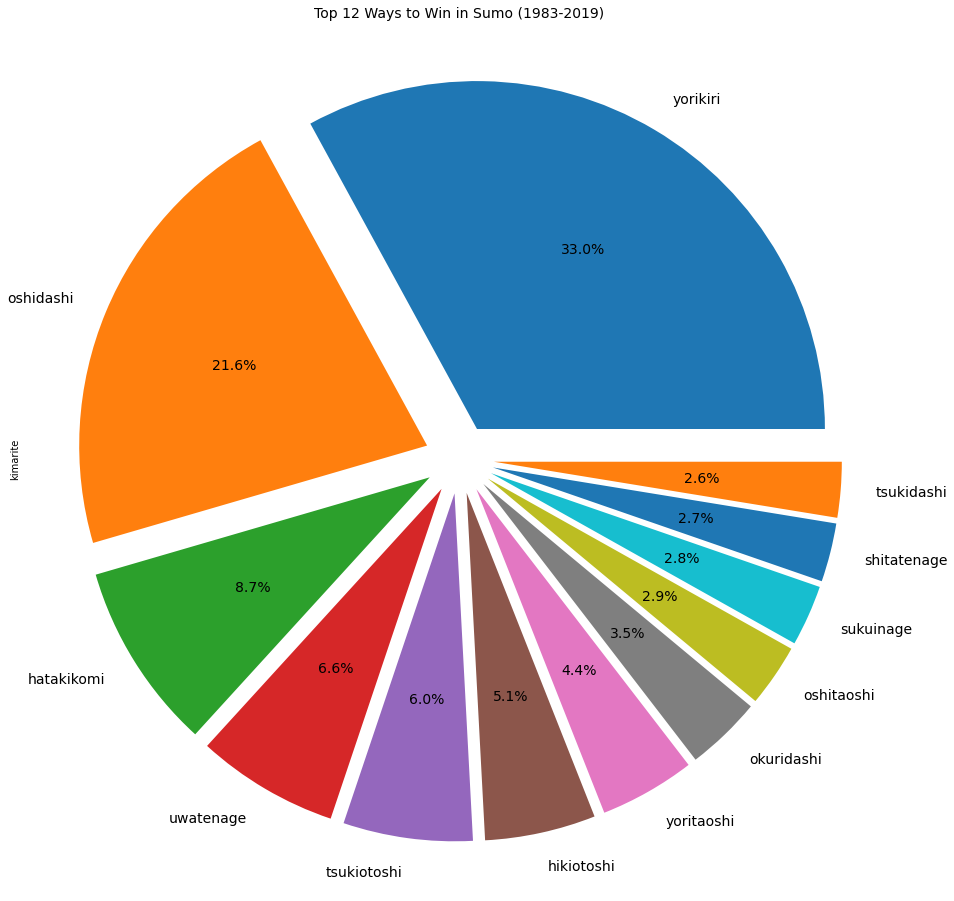

In [16]:
#explode = (0.1, 0.1, .01, .01, .01, .01, .01, .01, .01, .01) 
explode = []
num_kinds = 12
font_size = round((num_kinds * .5) + 8, 0)

for i in range(num_kinds):
    explode.append(.1)

plt.figure(figsize=(20,16)) 
plt.title(f"Top {num_kinds} Ways to Win in Sumo (1983-2019)", size = 14 )
win_types.head(num_kinds).plot(kind="pie", explode = explode, autopct='%1.1f%%',  textprops={'fontsize': font_size})

In [17]:
win_types.tail(10)

osakate             6
okuritsuriotoshi    6
mitokorozeme        4
zubuneri            4
yaguranage          4
tsumatori           2
gasshohineri        2
okurigake           2
izori               2
tasukizori          2
Name: kimarite, dtype: int64

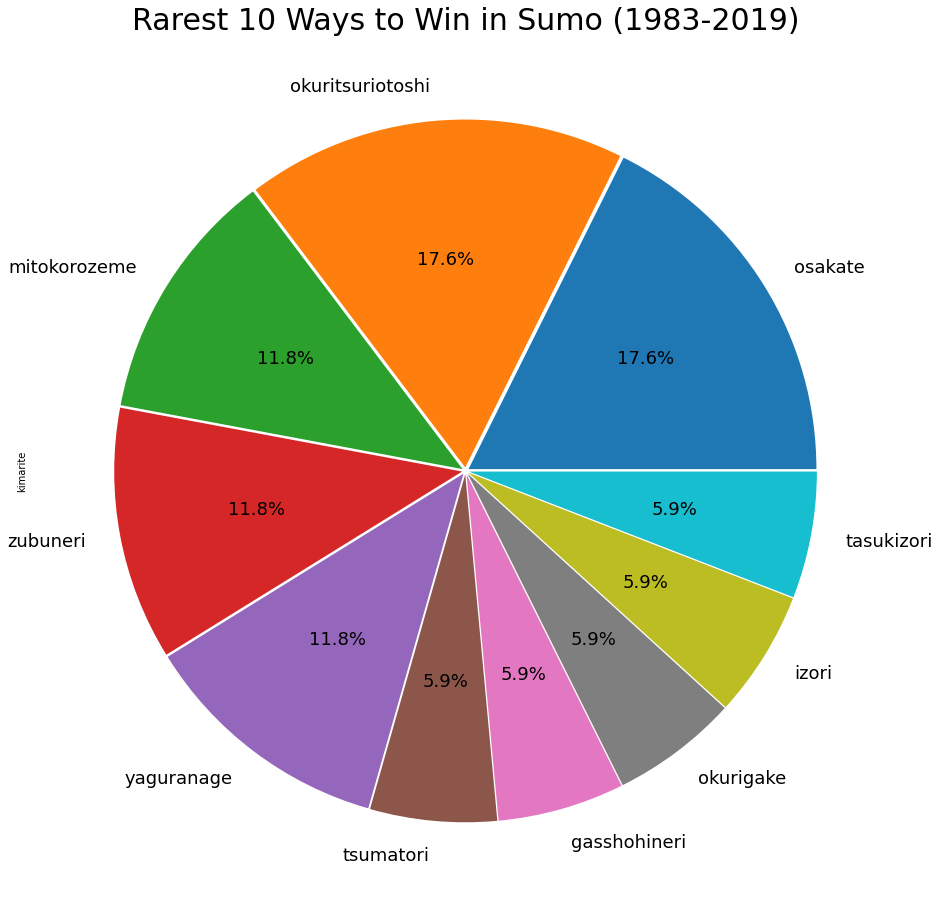

In [18]:
explode = (0.01, 0.01, .01, .01, .01, .01, .01, .01, .01, .01) 
plt.figure(figsize=(20,16)) 
plt.title("Rarest 10 Ways to Win in Sumo (1983-2019)", size = 30)
win_types.tail(10).plot(kind="pie", explode = explode, autopct='%1.1f%%',  textprops={'fontsize': 18})

Yorikiri and Oshidashi make up an astounding 57.6% of all wins in Sumo Wrestling Matches.

In [19]:
#Small function to return states
def sumo_finder(dataframe, column, name, exact=True):
    if exact == True:
        find_it = dataframe[dataframe[column].str.match(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia

    else:
        find_it = dataframe[dataframe[column].str.contains(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia
    return find_it

In [20]:
sumo_finder(full_df, "kimarite", "zubuneri")

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
1284,1998.03,5,21,M11e,Asahiyutaka,3-2 (8-7),True,zubuneri,33,M8e,Terao,2-3 (5-10),False
1285,1998.03,5,33,M8e,Terao,2-3 (5-10),False,zubuneri,21,M11e,Asahiyutaka,3-2 (8-7),True
906,1996.01,15,35,J9w,Kyokushuzan,8-7,True,zubuneri,1298,Ms5w,Kotoarashi,4-3,False
907,1996.01,15,1298,Ms5w,Kotoarashi,4-3,False,zubuneri,35,J9w,Kyokushuzan,8-7,True


In [21]:
full_df.head(50)

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
0,1988.01,1,51,Ms1e,Daizen,0-1 (6-1),False,yorikiri,1331,J13w,Saganobori,1-0 (8-7),True
1,1988.01,1,1331,J13w,Saganobori,1-0 (8-7),True,yorikiri,51,Ms1e,Daizen,0-1 (6-1),False
2,1988.01,1,1433,J12w,Kitafubuki,1-0 (5-10),True,yorikiri,1496,J13e,Seionada,0-1 (0-15),False
3,1988.01,1,1496,J13e,Seionada,0-1 (0-15),False,yorikiri,1433,J12w,Kitafubuki,1-0 (5-10),True
4,1988.01,1,1377,J12e,Iwatefuji,0-1 (4-11),False,tsukidashi,4138,J11w,Tochimatoi,1-0 (8-7),True
5,1988.01,1,4138,J11w,Tochimatoi,1-0 (8-7),True,tsukidashi,1377,J12e,Iwatefuji,0-1 (4-11),False
6,1988.01,1,1296,J11e,Kasugafuji,0-1 (8-7),False,tsukiotoshi,4140,J10w,Chikubayama,1-0 (7-8),True
7,1988.01,1,4140,J10w,Chikubayama,1-0 (7-8),True,tsukiotoshi,1296,J11e,Kasugafuji,0-1 (8-7),False
8,1988.01,1,1365,J10e,Hananofuji,0-1 (7-8),False,shitatenage,4094,J9w,Onishiki,1-0 (5-10),True
9,1988.01,1,4094,J9w,Onishiki,1-0 (5-10),True,shitatenage,1365,J10e,Hananofuji,0-1 (7-8),False


In [22]:
rikishi_rank_types = full_df['rikishi1_rank']

In [23]:
len(rikishi_rank_types)

214788

In [24]:
rikishi_rank_types.value_counts

<bound method IndexOpsMixin.value_counts of 0       Ms1e
1       J13w
2       J12w
3       J13e
4       J12e
        ... 
5857     S1w
5858     Y1w
5859     O1w
5860     O1w
5861     O2e
Name: rikishi1_rank, Length: 214788, dtype: object>

https://www.npmjs.com/package/sumo-rank?activeTab=readme

In [25]:
#Wrestler Ranks
yokozuna = []
ozeki = []
sekiwake = []
makunouchi = []
komosubi = []
juryo = []

#Catch-all in case one doesn't detect
unknown = []

#Will add winds later
east = 0
west = 0

for wrestler in rikishi_rank_types:
    if "Y" in wrestler: 
        yokozuna.append(wrestler)
    elif "O" in wrestler:
        ozeki.append(wrestler)
    elif "S" in wrestler:
        sekiwake.append(wrestler)
    elif "K" in wrestler:
        komosubi.append(wrestler)
    elif "M" in wrestler:
        makunouchi.append(wrestler)
    elif "J" in wrestler:
        juryo.append(wrestler)
    else:
        unknown.append(wrestler)

print(unknown)

# Make into another list
sumo_rank_full = [[yokozuna,ozeki,sekiwake,makunouchi,komosubi,juryo]]

sumo_ranks_grouped_df = df(sumo_rank_full,columns=['yokozuna','ozeki','sekiwake','makunouchi','komosubi','juryo'])

[]


TypeError: ignored

In [ ]:
for rank in sumo_rank_full:
    print(len(rank))

AttributeError: ignored

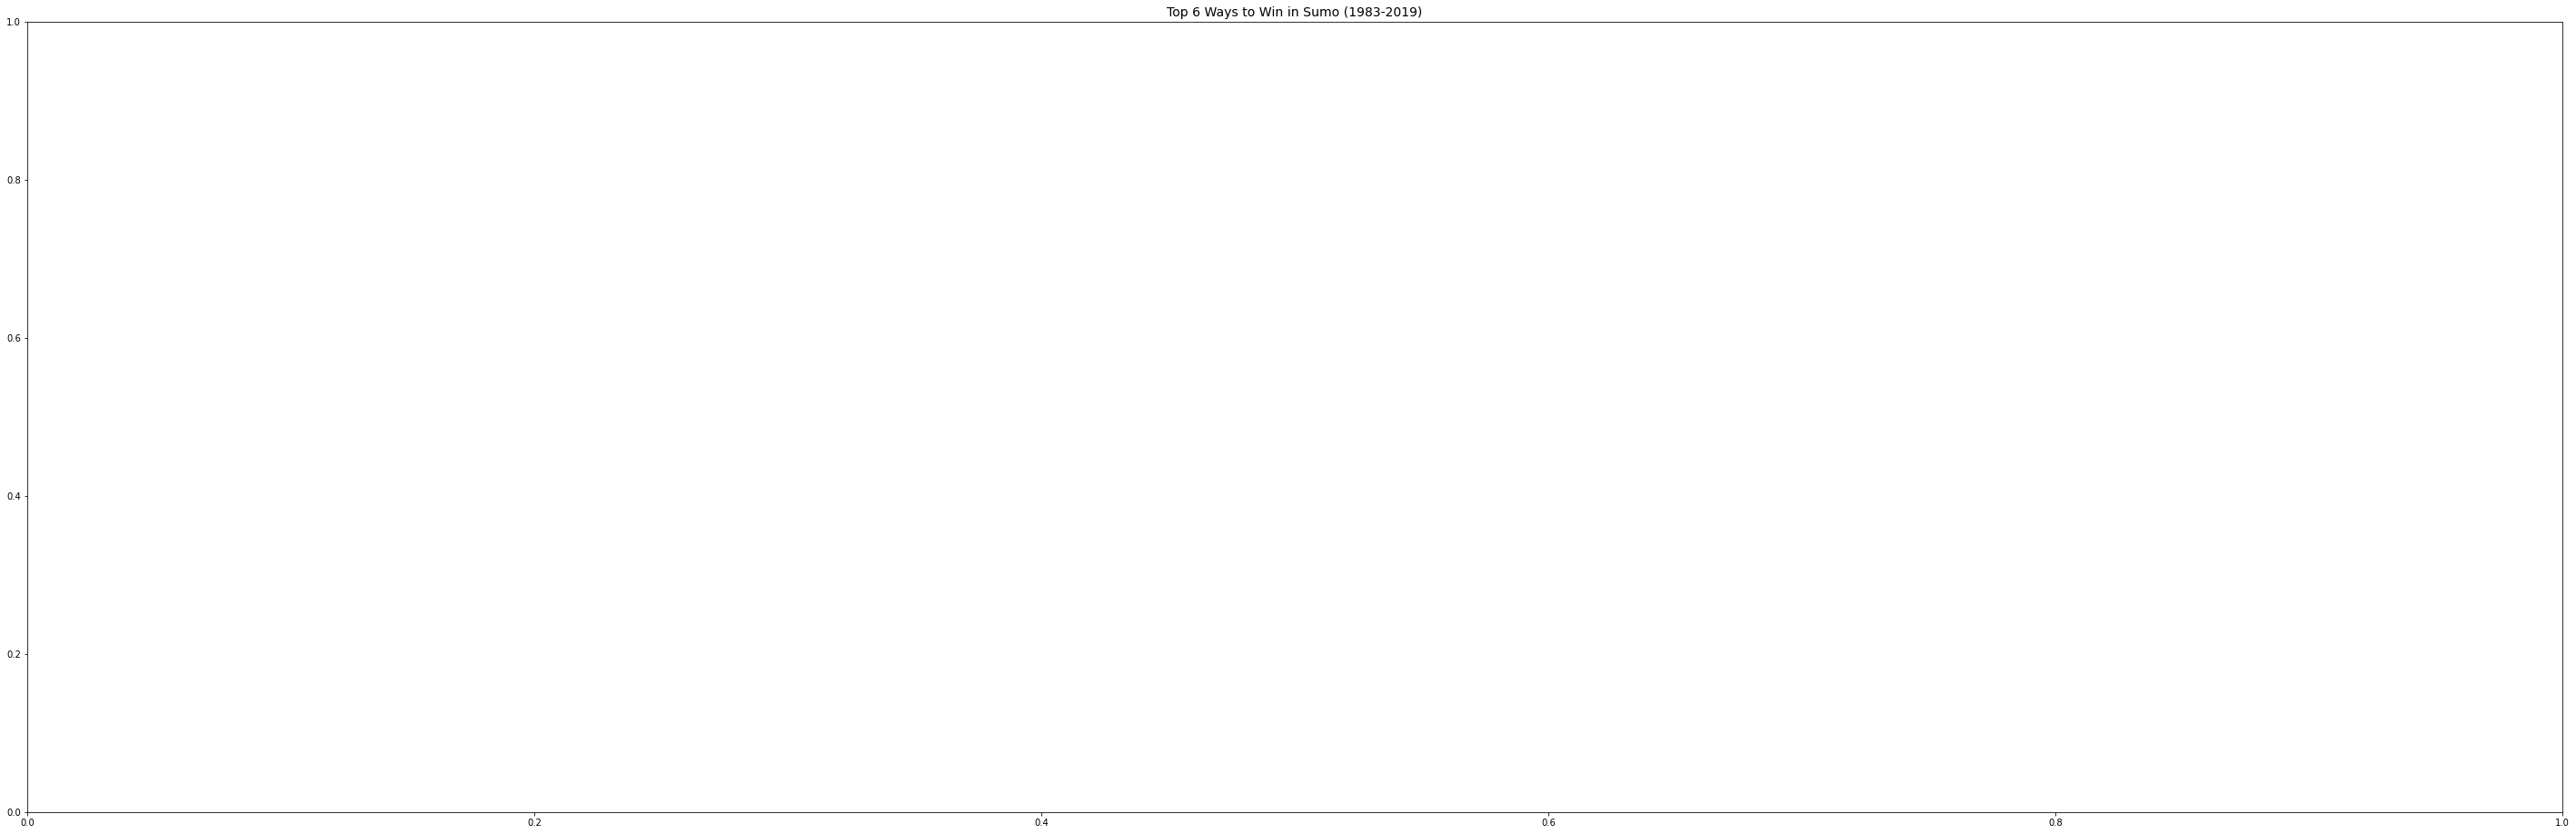

In [59]:
#explode = (0.1, 0.1, .01, .01, .01, .01, .01, .01, .01, .01) 
explode = []
num_kinds = 6
font_size = round((num_kinds * .5) + 8, 0)

for i in range(num_kinds):
    explode.append(.1)

plt.figure(figsize=(20,16)) 
plt.title(f"Top {num_kinds} Ways to Win in Sumo (1983-2019)", size = 14 )
sumo_rank_full.types.plot(kind="pie", explode = explode, autopct='%1.1f%%',  textprops={'fontsize': font_size})

In [46]:
rikishi_byrank = full_df.groupby(['rikishi1_rank']).mean()

In [47]:
rikishi_byrank = rikishi_byrank.sort_values(by="rikishi1_win", ascending=False)
rikishi_byrank.head(10)

,basho,day,rikishi1_id,rikishi1_win,rikishi2_id,rikishi2_win
rikishi1_rank,,,,,,
Ms3wHD,1983.010000,9.000000,4303.000000,1.000000,4129.000000,0.000000
Ms10e,2010.580000,14.000000,6539.000000,1.000000,5867.500000,0.000000
Y1e,2001.204130,7.883790,902.368616,0.824574,2201.596965,0.175426
Y1w,2000.935737,7.701830,1129.243272,0.757804,2504.481163,0.242196
Ms10w,1992.550000,14.500000,5575.500000,0.750000,4778.750000,0.250000
Ms9w,1985.295000,14.250000,4186.750000,0.750000,3546.750000,0.250000
Y2eHD,1987.724208,7.756831,1963.224044,0.743169,1445.573770,0.256831
Y2w,2005.503861,7.594059,412.069307,0.702970,2622.148515,0.297030
Y2wHD,1989.283898,7.203390,2055.779661,0.694915,1024.423729,0.305085


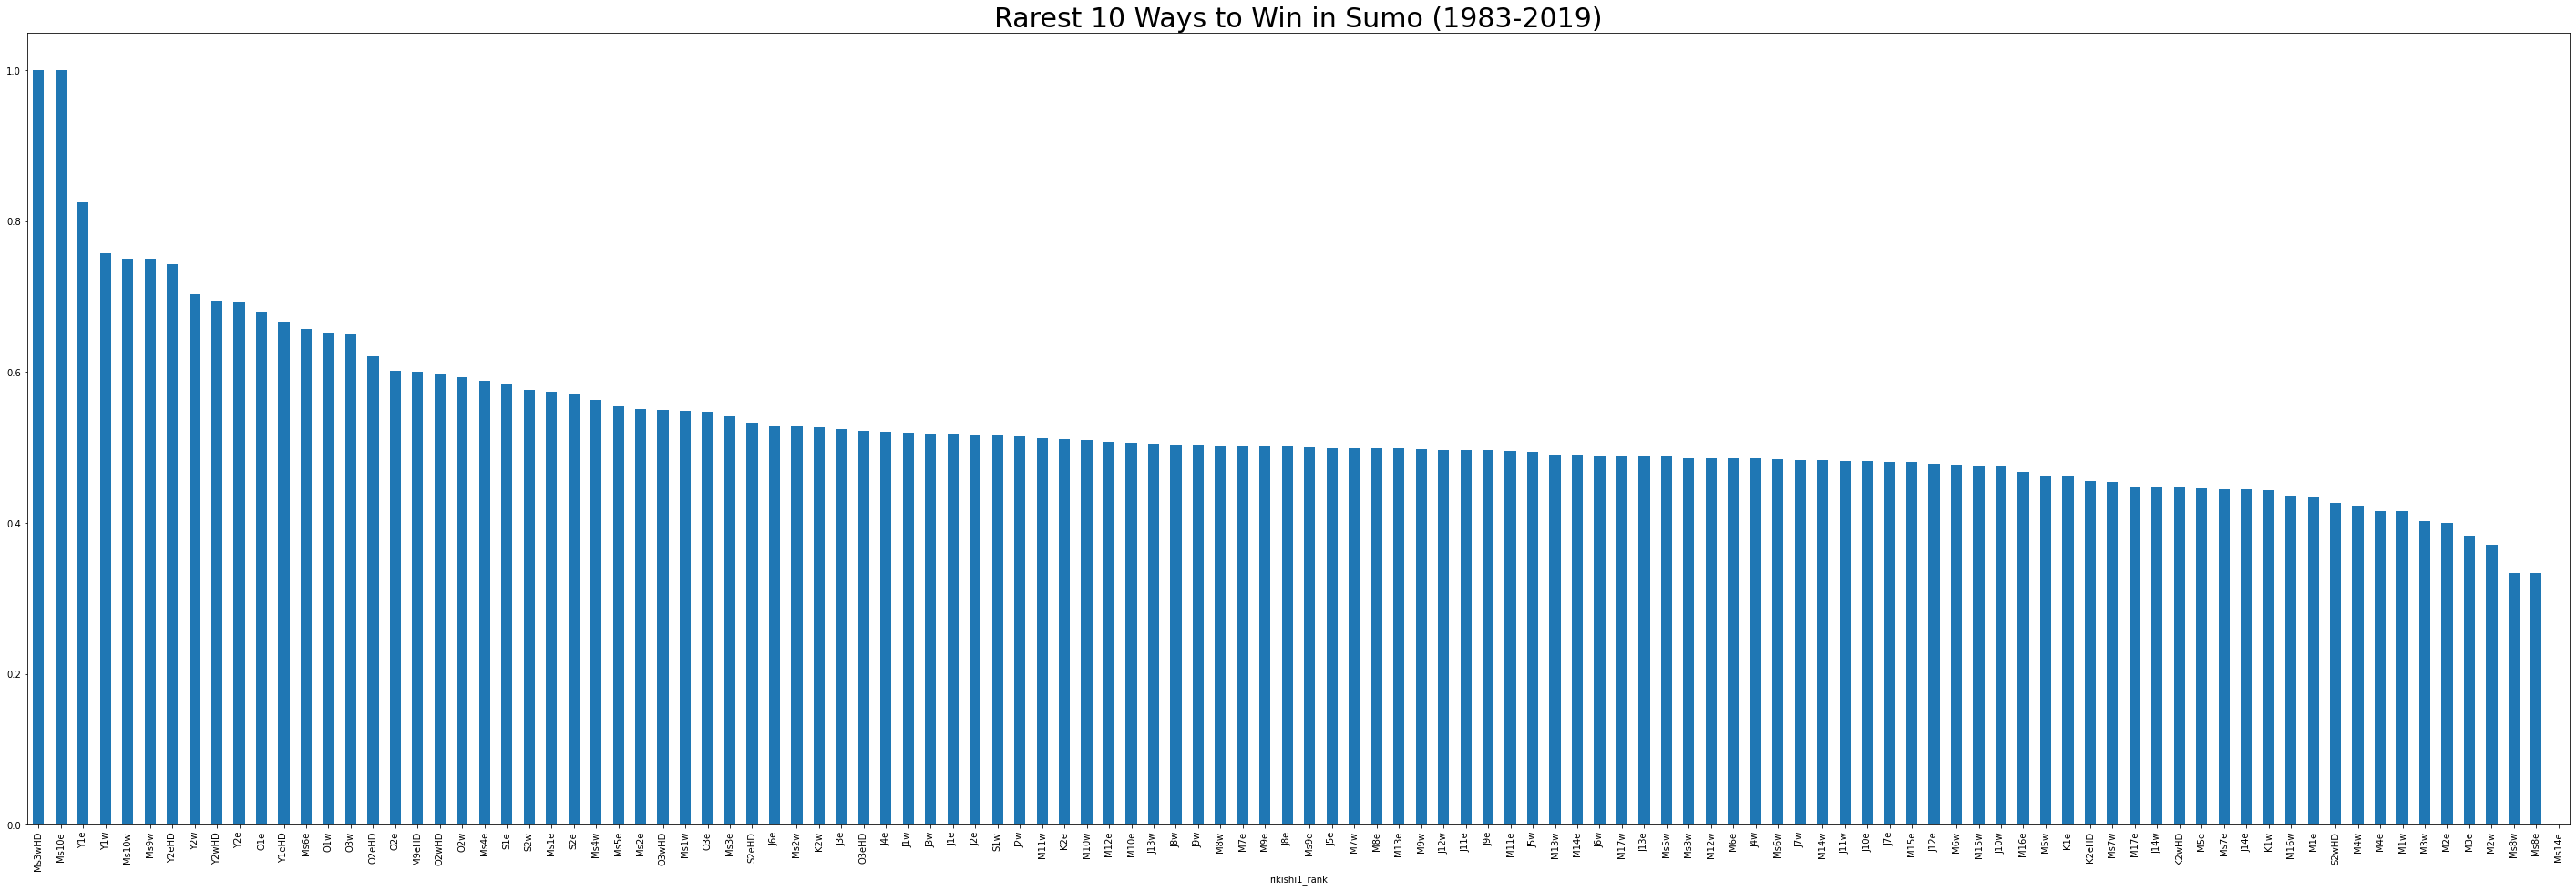

In [60]:
plt.figure(figsize=(50,16)) 
plt.title("Rarest 10 Ways to Win in Sumo (1983-2019)", size = 30)
rikishi_byrank["rikishi1_win"].plot(kind="bar")

In [42]:
rikishi_byname = full_df.groupby(['rikishi1_shikona']).mean()
rikishi_byname = rikishi_byname.sort_values(by="rikishi1_win", ascending=False)
rikishi_byname.head(10)

,basho,day,rikishi1_id,rikishi1_win,rikishi2_id,rikishi2_win
rikishi1_shikona,,,,,,
Shidenryu,1988.11,11.0,1290.0,1.0,1381.0,0.0
Masunosho,2017.09,5.0,11855.0,1.0,6559.0,0.0
Saito,1998.11,14.0,129.0,1.0,61.0,0.0
Wakaadachi,1992.09,13.0,34.0,1.0,76.0,0.0
Uchida,2003.03,10.0,2834.0,1.0,149.0,0.0
Horyuyama,2014.06,10.5,11764.0,1.0,5993.0,0.0
Takanonada,1995.07,14.0,1336.0,1.0,57.0,0.0
Kototamiya,1999.09,9.0,876.0,1.0,66.0,0.0
Kurimoto,1994.05,15.0,177.0,1.0,174.0,0.0


In [ ]:
#Save Df
full_df.to_csv("full_df.csv", index=True)